In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Загрузка данных

In [2]:
train = pd.read_csv('./kurs/train.csv')
test = pd.read_csv('./kurs/test.csv')

Описание датасета:

* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры


In [3]:
train.head()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
train.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


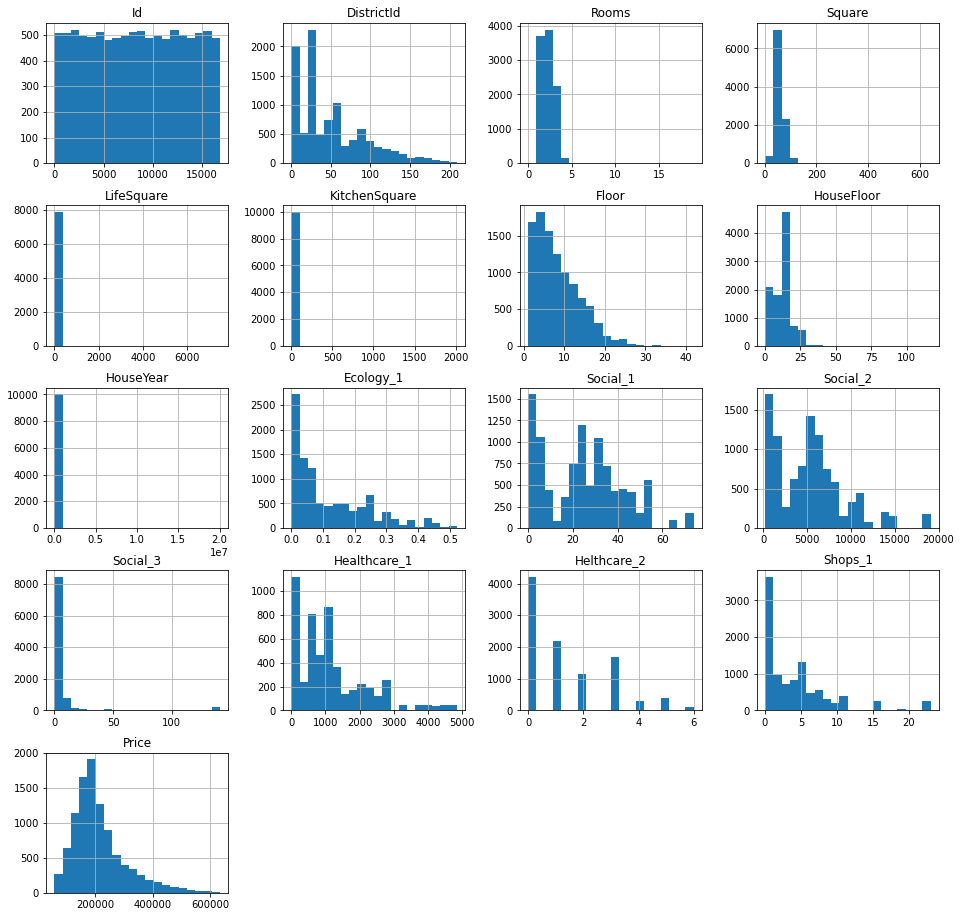

In [10]:
train.hist(bins=20, figsize=(16,16))
plt.show()

### Удаляем выбросы и обрабатываем пропущенные значения

In [11]:
train.loc[train['LifeSquare'] > 200, 'LifeSquare'] = train['LifeSquare'].mean()
train['LifeSquare'].fillna(train['LifeSquare'].mean(), inplace=True)
train.loc[train['Square'] > 200, 'Square'] = train['Square'].mean()
train.loc[train['KitchenSquare'] > 10, 'KitchenSquare'] = train['KitchenSquare'].mean()

In [12]:
train.loc[train['Rooms'] >= 10, 'Rooms'] = train['Rooms'].median()
train['Healthcare_1'].fillna(train['Healthcare_1'].mean(), inplace=True)

In [13]:
train.loc[train['Ecology_2'] == 'B', 'Ecology_2'] = '0'
train.loc[train['Ecology_2'] == 'A', 'Ecology_2'] = '1'

train.loc[train['Ecology_3'] == 'B', 'Ecology_3'] = '0'
train.loc[train['Ecology_3'] == 'A', 'Ecology_3'] = '1'

train.loc[train['Shops_2'] == 'B', 'Shops_2'] = '0'
train.loc[train['Shops_2'] == 'A', 'Shops_2'] = '1'

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
y = train.iloc[:, -1:]
X = train.iloc[:, :-1]
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

### Создаем модель и проверяем на валидацонной выборке

In [16]:
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor 

In [ ]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)
model.fit(X_train, y_train.iloc[:,0])
y_pred_rf = model.predict(X_valid)

In [ ]:
R2_rf = r2_score(y_valid, y_pred_rf)
R2_rf

### Обрабатываем тестовые данные и делаем предсказание

In [ ]:
test.loc[test['Ecology_2'] == 'B', 'Ecology_2'] = '0'
test.loc[test['Ecology_2'] == 'A', 'Ecology_2'] = '1'

test.loc[test['Ecology_3'] == 'B', 'Ecology_3'] = '0'
test.loc[test['Ecology_3'] == 'A', 'Ecology_3'] = '1'

test.loc[test['Shops_2'] == 'B', 'Shops_2'] = '0'
test.loc[test['Shops_2'] == 'A', 'Shops_2'] = '1'

In [ ]:
test['LifeSquare'].fillna(train['LifeSquare'].mean(), inplace=True)
test['Healthcare_1'].fillna(train['Healthcare_1'].mean(), inplace=True)

In [ ]:
y_pred_result = model.predict(test)

In [ ]:
result = pd.DataFrame({"Id" : test['Id'], "Price": y_pred_result})

In [ ]:
result.to_csv('VKashirin_predictions.csv', index=False)